In [1]:
#Importing Important Libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D


In [2]:
Data = pd.read_csv("USA_Housing.csv")

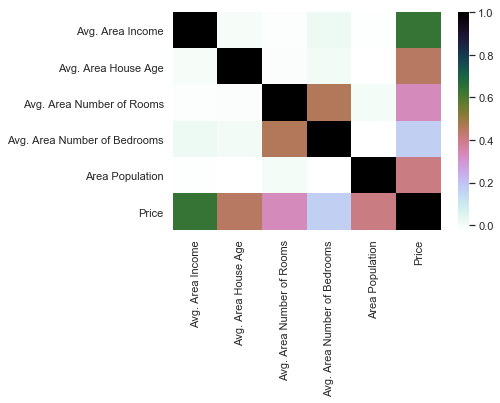

In [3]:
# Plotting heat map for analyzing correlation with house price
corr = Data.corr()
sns.set(style='whitegrid',color_codes=True)
plt.xticks(rotation=90)
sns.heatmap(corr,cmap = plt.cm.cubehelix_r)

By plotting the heatmap we will get the idea that many features in the dataset have no relation with the price , so we can drop that features also

# Normalize Data

In [4]:
TrainAvgAreaIncome = np.array(Data['Avg. Area Income'])/ max(Data['Avg. Area Income'])
TrainAvgAreaHouseAge = np.array(Data['Avg. Area House Age'])/ max(Data['Avg. Area House Age'])
TrainPrice = np.array(Data['Price'])/ max(Data['Price'])

## Plot your scores

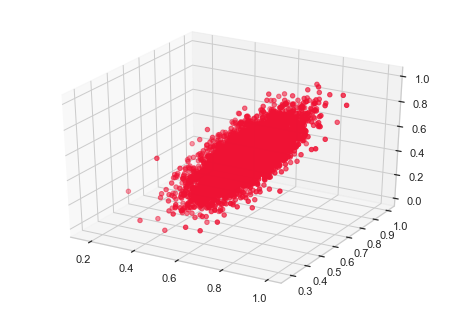

In [5]:

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(TrainAvgAreaIncome, TrainAvgAreaHouseAge,TrainPrice, color='#ef1234')
plt.show()

## Generate The Values of X,Y, and B

In [7]:
m = len(TrainAvgAreaIncome)
x0 = np.ones(m)
X = np.array([x0, TrainAvgAreaIncome, TrainAvgAreaHouseAge]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(TrainPrice)
alpha = 0.1

### Now Define Our Cost Function

In [8]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [9]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

0.13472714692771737


## Now Reduce The Error Using Gradient Descent Algorithm

In [10]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

### Now we will Compute The Final Value of B

In [11]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.48187524  0.92587272  0.62316072]
0.003934330543196427


## Let’s calculate RMSE and R^2R Score of our model to evaluate.

In [12]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

0.08870547382429601
0.6152185122840215
